#### 서울시 코로나19 웹사이트(https://www.seoul.go.kr/coronaV/coronaStatus.do) 로부터 확진자 현황 데이터를 가져와 분석한다.

##### <font color = blue> Step1. Data Crawling </font>
###### <font color = blue> - 먼저 웹사이트의 '서울 확진자 현황 테이블'을 읽어와서, 분석에 용이한 csv 파일로 저장한다.  </font>

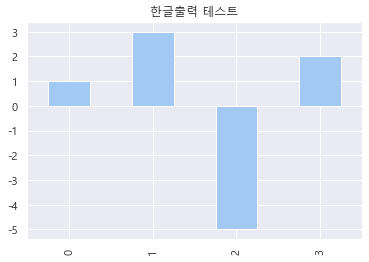

In [2]:
#### 대부분의 분석에서 일반적으로 설치하는 패키지들 ... 
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid', palette="pastel")

import warnings
warnings.filterwarnings("ignore")

#### 한글사용을 위해 한글폰트를 지정하고, 차트에서 음수값 에러나지 않게 설정 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

#### 제대로 설정됐는지 테스트 
pd.Series([1, 3, -5, 2]).plot.bar(title = '한글출력 테스트')

In [3]:
#### 서울시 covid19 웹사이트를 가져와서, 테이블을 만든다. 
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do "
table = pd.read_html(url)
len(table)  

6

In [10]:
#### 총 6개의 테이블을 가져왔다. 이중 우리가 사용할 테이블은? 

#table[0]
#table[1]
#table[2]
#table[3]
table[4]
#table[5]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1464,13710,7.17.,송파구,-,관악구 사무실 관련,서울의료원
1,1463,13688,7.17.,송파구,-,관악구 사무실 관련,서울의료원
2,1462,13686,7.17.,은평구,-,중구 한화생명 관련,서북병원
3,1461,13698,7.17.,성동구,-,확인 중,서남병원
4,1460,13696,7.17.,강남구,-,중구 한화생명 관련,서남병원
...,...,...,...,...,...,...,...
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [17]:
#### 확진자에 대한 상세 정보가 들어있는 4번 테이블이 분석 대상이다. 
df = table[4]
print(df.shape)
df

(1464, 7)


,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1464,13710,7.17.,송파구,-,관악구 사무실 관련,서울의료원
1,1463,13688,7.17.,송파구,-,관악구 사무실 관련,서울의료원
2,1462,13686,7.17.,은평구,-,중구 한화생명 관련,서북병원
3,1461,13698,7.17.,성동구,-,확인 중,서남병원
4,1460,13696,7.17.,강남구,-,중구 한화생명 관련,서남병원
...,...,...,...,...,...,...,...
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [20]:
#### df를 csv파일로 저장한다. 이때 파일명은 "Seoul-covid19-최종확진일" 형태로 만들자. 

last_day = df.loc[0, "확진일"]          ### 0 row의 확진일 컬럼값만 가져오기 
last_day = last_day.replace(".","_" )   ## 최종확진일을 파일명에 넣을 것이므로, 점을 아래밑줄로 변경 
print(last_day) 

file_name = f"Seoul-covid19_{last_day}.csv"  ### 만들어질 파일명을 지정함 
print(file_name)

7_17_
Seoul-covid19_7_17_.csv


In [22]:
### 데이터 프레임을 지정한 이름을 갖는 csv 파일로 내보내고, 이를 다시 판다스로 읽어보기 
df.to_csv(file_name, index = False)   ### index는 없는 편이 좋다. 
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1464,13710,7.17.,송파구,-,관악구 사무실 관련,서울의료원
1,1463,13688,7.17.,송파구,-,관악구 사무실 관련,서울의료원
2,1462,13686,7.17.,은평구,-,중구 한화생명 관련,서북병원
3,1461,13698,7.17.,성동구,-,확인 중,서남병원
4,1460,13696,7.17.,강남구,-,중구 한화생명 관련,서남병원
...,...,...,...,...,...,...,...
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [ ]:
################################################################################################
### [참고] 파이썬의 csv 기본 인코딩은 UTF-8이다.(엑셀에서는 값이 깨진다.)
### csv를 Excel에서 제대로 열리게 하려면 아래와 같이 cp949를 사용한다. 

#df.to_csv(file_name, index = False, encoding="cp949")
#pd.read_csv(file_name, encoding="cp949")
################################################################################################

##### <font color = blue> Step2. EDA & Visualization </font>
###### <font color = blue> - 생성된 csv파일로부터 DataFrame을 만들고, 이를 시각화 하기 좋게 전처리 한다. </font>

In [23]:
#### csv 파일을 읽어와서 데이터 프레임을 만들고, 이를 연번 순서대로 정렬 
df = pd.read_csv("Seoul-covid19_7_17_.csv")
df = df.sort_values('연번', ascending = True)

print(df.shape)
df.head()

(1464, 7)


,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1463,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)


In [25]:
#### DF에 확진일자(yyyy-mm-dd), 확진월(month), 주차(week)를 추가한다. 

df["확진일자"] = pd.to_datetime("2020-"+ df["확진일"].str.replace(".", "-"))      #### 데이터 타입을 날짜 형태로 변경하고, 연도를 추가하자 
df["월"] = df["확진일자"].dt.month         #### 확진일자로부터 월과 주차를 구해낸다. 
df["주"] = df["확진일자"].dt.week         #### dt.week는 대상 주가 해당연도의 몇번째 주차인지 알려준다. 
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
1463,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5
...,...,...,...,...,...,...,...,...,...,...
4,1460,13696,7.17.,강남구,-,중구 한화생명 관련,서남병원,2020-07-17,7,29
3,1461,13698,7.17.,성동구,-,확인 중,서남병원,2020-07-17,7,29
2,1462,13686,7.17.,은평구,-,중구 한화생명 관련,서북병원,2020-07-17,7,29
1,1463,13688,7.17.,송파구,-,관악구 사무실 관련,서울의료원,2020-07-17,7,29


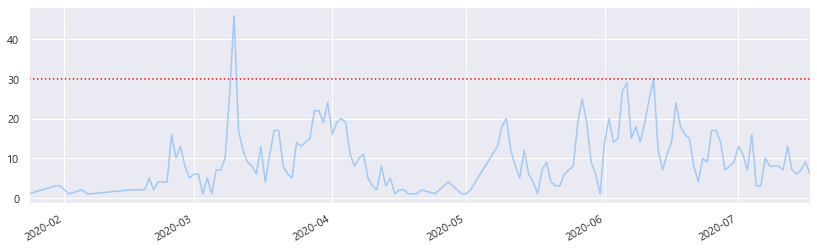

In [26]:
#### 일자별 확진자수 추이를 시각화 해보자 

df["확진일자"].value_counts().sort_index().plot(figsize=(14, 4))
plt.axhline(30, color="red", linestyle=":")

In [27]:
### x축 레이블이 보기 좋지 않다. 월일 컬럼을 만들자 
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1463,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4,01-24
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31


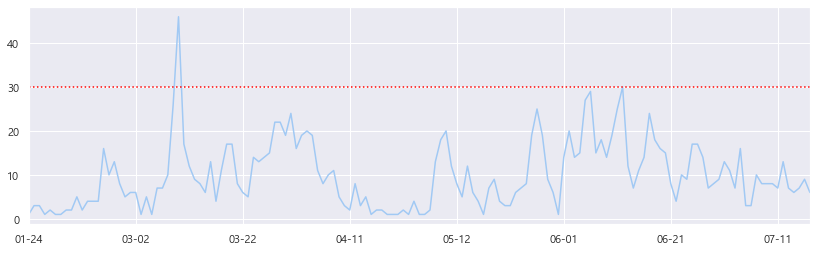

In [28]:
df["월일"].value_counts().sort_index().plot(figsize=(14, 4))
plt.axhline(30, color="red", linestyle=":")

In [31]:
#### 확진자 수가 가장 많았던 날은 언제인가? 확진일자에 대한 통계량을 만들어 보자 
day_count = df["확진일자"].value_counts().sort_index()
print(day_count)
print('-------------------------------------------------------------------------')
day_count.describe()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
             ..
2020-07-13    7
2020-07-14    6
2020-07-15    7
2020-07-16    9
2020-07-17    6
Name: 확진일자, Length: 147, dtype: int64
-------------------------------------------------------------------------


count    147.000000
mean       9.959184
std        7.548816
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       46.000000
Name: 확진일자, dtype: float64

In [57]:
day_count[day_count == day_count.max()]

2020-03-10    46
Name: 확진일자, dtype: int64

##### <font color = blue> -> 1월부터 현재까지 확진자가 발생한 날은 총 146일이었으며,하루 평균 약 10명이 발생 </font>
##### <font color = blue> -> 하루에 가장 많은 확진자가 발생했던 날은 46명이 발생했던 3월10일임 </font>

In [58]:
#### 3월 10일에 무슨일이 있었는가? 
df[df["확진일자"] == "2020-03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1307,157,7525,3.10.,동작구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1306,158,7721,3.10.,동작구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1305,159,7666,3.10.,관악구,-,구로구 콜센터 관련,서울의료원(퇴원),2020-03-10,3,11,03-10
1304,160,7644,3.10.,관악구,-,구로구 콜센터 관련,보라매병원(퇴원),2020-03-10,3,11,03-10
1303,161,7603,3.10.,관악구,-,구로구 콜센터 관련,보라매병원(퇴원),2020-03-10,3,11,03-10


##### <font color = blue> Step 3. 데이터 전처리 : time series dataset으로 변환 </font>
###### <font color = blue>- 현재의 데이터에는 확진자가 발생하지 않은 날짜는 빠져있다. 시각화에 용이한 DateTimeIndex를 만들자. </font>
###### <font color = blue>- 우선 데이터의 첫날과 마지막 날짜로부터, DateTimeIndex를 만든다. </font>

In [74]:
days = pd.date_range('2020-01-24', '2020-07-16')
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16'],
              dtype='datetime64[ns]', length=175, freq='D')

In [75]:
#### 시각화에서 시간축으로 사용하기 위해, days를 데이터 프레임으로 변환한다. 
df_days = pd.DataFrame({'확진일자':days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
170,2020-07-12
171,2020-07-13
172,2020-07-14
173,2020-07-15


In [76]:
#### 일자별 확진자 수를 구하고, 이를 데이터 프레임으로 변환한다. 
daily_case = df['확진일자'].value_counts()
df_daily_case = pd.DataFrame({'확진자수':daily_case})
df_daily_case

,확진자수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-02-02,1
2020-04-20,1
2020-04-30,1
2020-03-03,1


In [77]:
#### 앞서만든 2개의 데이터프레임을 결합하여, 전체 일자별 확진자 수를 구한다. 
all_days = df_days.merge(df_daily_case, 
                        left_on ='확진일자', 
                        right_on=df_daily_case.index, how="left" )

all_days

,확진일자,확진자수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
170,2020-07-12,13.0
171,2020-07-13,7.0
172,2020-07-14,6.0
173,2020-07-15,7.0


In [78]:
#### NaN을 0으로 대체한 후, 일자별 누적 확진자 수를 계산한다. 
all_days['누적확진자수'] = all_days['확진자수'].fillna(0).cumsum()
all_days

,확진일자,확진자수,누적확진자수
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
170,2020-07-12,13.0,1429.0
171,2020-07-13,7.0,1436.0
172,2020-07-14,6.0,1442.0
173,2020-07-15,7.0,1449.0


In [79]:
#### 그래프에 표시되기 좋도록, 확진일자에서 연도는 제거한다. 
#### 연월일 형태의 '확진일자'로 부터 월일 형태의 '일자'를 만들고 이를 index로 지정한다. 

all_days["일자"] = all_days["확진일자"].astype(str).map(lambda x : x[-5:])
all_days = all_days.set_index('일자')
all_days

,확진일자,확진자수,누적확진자수
일자,,,
01-24,2020-01-24,1.0,1.0
01-25,2020-01-25,NaN,1.0
01-26,2020-01-26,NaN,1.0
01-27,2020-01-27,NaN,1.0
01-28,2020-01-28,NaN,1.0
...,...,...,...
07-12,2020-07-12,13.0,1429.0
07-13,2020-07-13,7.0,1436.0
07-14,2020-07-14,6.0,1442.0


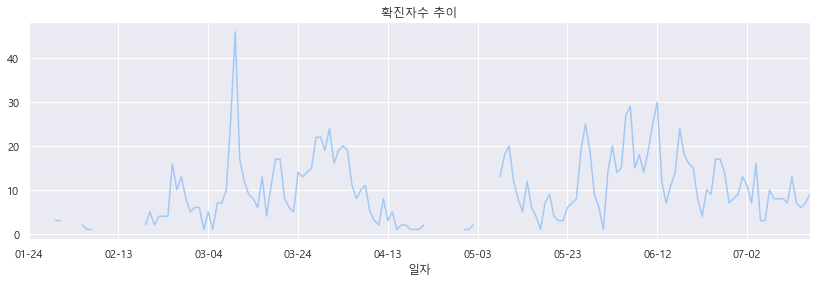

In [66]:
all_days['확진자수'].plot(figsize=(14,4), title = '확진자수 추이')

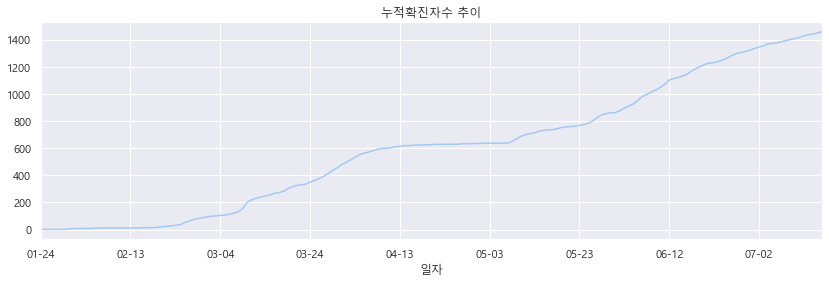

In [84]:
all_days['누적확진자수'].plot(figsize=(14,4), title = '누적확진자수 추이')

##### <font color = blue> Question 1. 특정 요일에 따른 확진자가 발생 수가 차이가 있는가? </font>
###### <font color = blue> - 월별x요일별 확진자수 시각화를 해보자 </font>

In [85]:
all_days["확진월"] = all_days["확진일자"].dt.month
all_days["확진요일"] = all_days["확진일자"].dt.dayofweek
all_days.head()

,확진일자,확진자수,누적확진자수,확진월,확진요일
일자,,,,,
01-24,2020-01-24,1.0,1.0,1,4
01-25,2020-01-25,NaN,1.0,1,5
01-26,2020-01-26,NaN,1.0,1,6
01-27,2020-01-27,NaN,1.0,1,0
01-28,2020-01-28,NaN,1.0,1,1


In [90]:
# 월별, 요일별 확진수를 groupby로 구한 후, 숫자로 표현된 요일을 문자로 바꿔준다. 
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
print(dayofweek)

print('-----------------------------------------------------------------')

all_day_week = all_days.groupby(["확진월", "확진요일"])["확진자수"].sum()
all_day_week = all_day_week.unstack().astype(int)
print(all_day_week)

print('-----------------------------------------------------------------')

all_day_week.columns = dayofweek
all_day_week

['월', '화', '수', '목', '금', '토', '일']
-----------------------------------------------------------------
확진요일   0   1   2   3   4   5   6
확진월                             
1      0   0   0   3   4   0   0
2      4  16  14  19  11   9   7
3     69  89  46  44  48  45  50
4     16  17  28  27  26  22  20
5     27  36  34  34  32  36  29
6     55  67  66  75  90  70  37
7     10  16  28  28  15  23  16
-----------------------------------------------------------------


,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,10,16,28,28,15,23,16


In [91]:
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,10,16,28,28,15,23,16


##### <font color = blue> Question 2. 행정구역별 확진자가 발생 수가 차이가 어떠한가? </font>
###### <font color = blue> - 구별 확진자수 시각화를 해보자 </font>

In [92]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1463,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4,01-24
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1461,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1459,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31


관악구     135
강남구      92
구로구      89
강서구      81
영등포구     70
Name: 거주지, dtype: int64


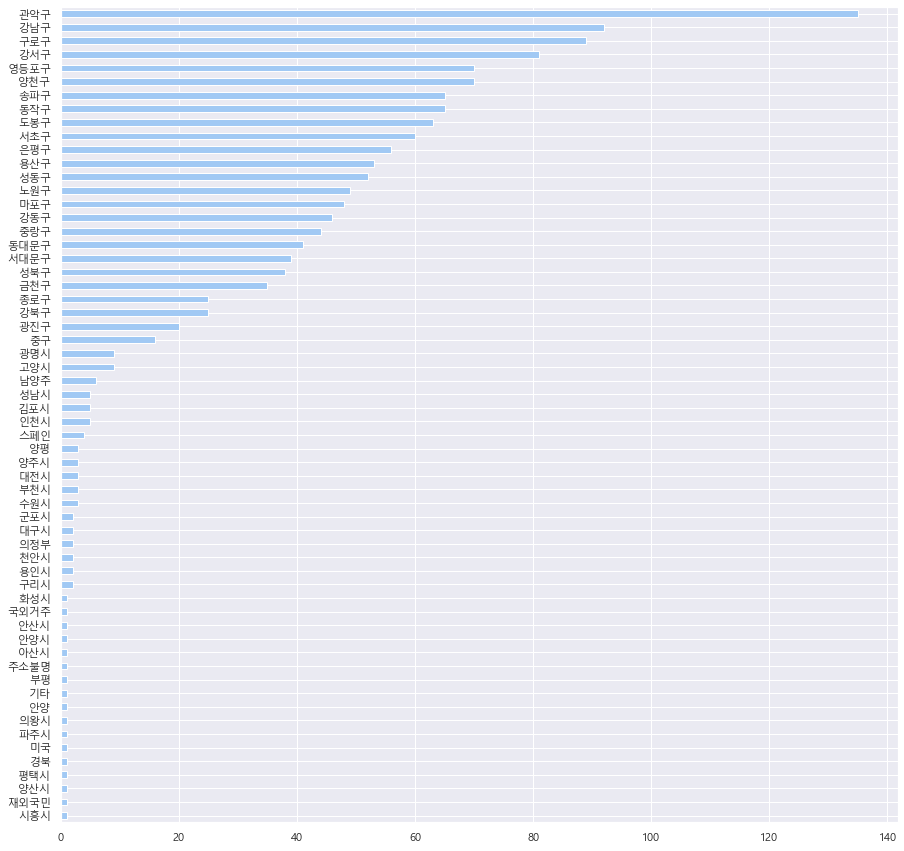

In [98]:
area_count = df["거주지"].value_counts()

print(area_count.head())
area_count.sort_values().plot.barh(figsize=(15, 15))

##### <font color = blue> Question 3. 주로 어떤 경로로 인해 확진자가 발생되었는가? </font>
###### <font color = blue> - 접촉력별 확진자수 시각화를 해보자 </font>

In [100]:
df['접촉력'].value_counts()

해외 접촉 추정       302
이태원 클럽 관련      139
확인 중           124
리치웨이 관련        119
구로구 콜센터 관련      60
              ... 
#7573 접축 추정      1
대구 거주            1
#10407 접촉        1
#9364 접촉         1
신천지대구교회 관련       1
Name: 접촉력, Length: 141, dtype: int64

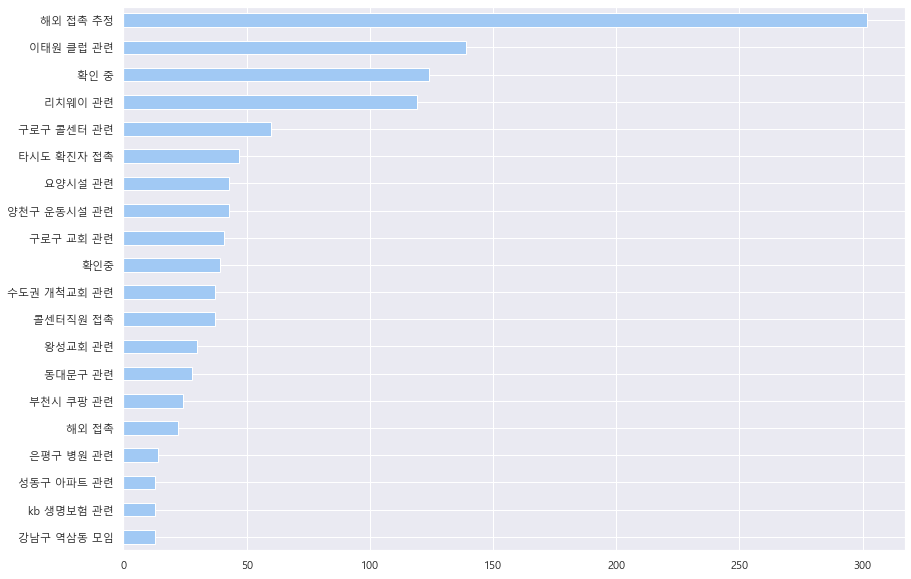

In [110]:
#### 접촉력 중에서 비중이 높은 20개를 뽑아 시각화 해보자 
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
contact_count_top.plot.barh(figsize=(14, 10))

##### <font color = blue> Question 4. 해외감염을 제외한 가장 큰 전염경로는 이태원 클럽 </font>
###### <font color = blue> - 이태원 클럽관련 확진자 현황을 알아보자 </font>

In [116]:
df[df["접촉력"].str.contains("이태원") ]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
826,638,10833,5.08.,종로구,-,이태원 클럽 관련,보라매병원(퇴원),2020-05-08,5,19,05-08
825,639,10832,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08
824,640,10839,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08
823,641,10831,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08
822,642,10840,5.08.,용산구,-,이태원 클럽 관련,국군수도통합병원(퇴원),2020-05-08,5,19,05-08
...,...,...,...,...,...,...,...,...,...,...,...
530,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05
515,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05
508,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원(퇴원),2020-06-06,6,23,06-06
499,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06


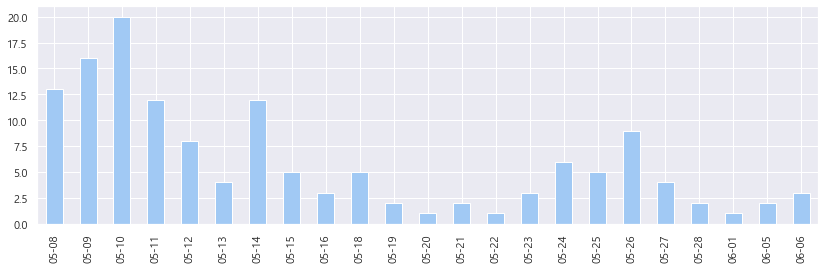

In [132]:
df_club = df[df["접촉력"].str.contains("이태원")]
df_club["월일"].value_counts().sort_index().plot.bar(figsize=(14, 4))

##### <font color = blue> Question 5. 해외감염의 경우 주로 어느나라로 부터 감염되었는가? </font>
###### <font color = blue> - 여행력 데이터를 분석해보자 </font>

In [134]:
df['여행력'].describe()

count     1464
unique      61
top          -
freq      1136
Name: 여행력, dtype: object

In [136]:
df['여행력'].value_counts()

-               1136
미국               125
영국                47
필리핀               18
스페인               11
                ... 
미국, 캐나다, 멕시코       1
우한 교민              1
미국, 브라질            1
중국 청도              1
콩코, 프랑스            1
Name: 여행력, Length: 61, dtype: int64

In [142]:
#### 우선 여행력이 있는 데이터만 추출한다. 여행력이 없는 경우 -로 입력되어 있는데 이것을 결측치로 바꿔준다. 

df["여행력"] = df["여행력"].replace("-", np.nan)
df_oversea = df[df["여행력"].notnull()].copy()

print(df_oversea.shape)
df_oversea.head(10)

(328, 11)


,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1463,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4,01-24
1462,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1460,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1456,8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원),2020-02-02,2,5,02-02
1455,9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원),2020-02-05,2,6,02-05
1453,11,23,2.6.,서대문구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-02-06,2,6,02-06
1452,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,02-07
1437,27,593,2.23.,강서구,베트남,해외 접촉,서울의료원(퇴원),2020-02-23,2,8,02-23
1424,40,924,2.25.,금천구,중국 청도,해외 접촉,국립중앙의료원(퇴원),2020-02-25,2,9,02-25
1412,52,1378,2.25.,송파구,태국,해외 접촉,보라매병원(퇴원),2020-02-25,2,9,02-25


In [151]:
#### 확진일자 x 국가별  확진자수를 그룹핑하고, 이로부터 국가별 누적 확진자 수를 구한다. 

day_oversea = df_oversea.groupby(["확진일자", "여행력"])["연번"].count()
day_oversea = day_oversea.groupby(level=[1]).cumsum()
df_day_oversea = pd.DataFrame(day_oversea).reset_index()
df_day_oversea

,확진일자,여행력,연번
0,2020-01-24,중국 우한시,1
1,2020-01-30,중국 우한시,3
2,2020-02-02,우한 교민,1
3,2020-02-05,싱가포르,1
4,2020-02-06,중국 우한시,4
...,...,...,...
207,2020-07-10,카자흐스탄,7
208,2020-07-12,영국,47
209,2020-07-12,우즈베키스탄,5
210,2020-07-15,이라크,3


In [152]:
df_day_oversea = df_day_oversea.rename(columns={"여행력":"국가" ,"연번":"누적확진자수"})
df_day_oversea

,확진일자,국가,누적확진자수
0,2020-01-24,중국 우한시,1
1,2020-01-30,중국 우한시,3
2,2020-02-02,우한 교민,1
3,2020-02-05,싱가포르,1
4,2020-02-06,중국 우한시,4
...,...,...,...
207,2020-07-10,카자흐스탄,7
208,2020-07-12,영국,47
209,2020-07-12,우즈베키스탄,5
210,2020-07-15,이라크,3


미국        52
영국        24
필리핀       15
프랑스        9
스페인        7
카자흐스탄      6
캐나다        5
일본         5
멕시코        5
우즈베키스탄     4
Name: 국가, dtype: int64


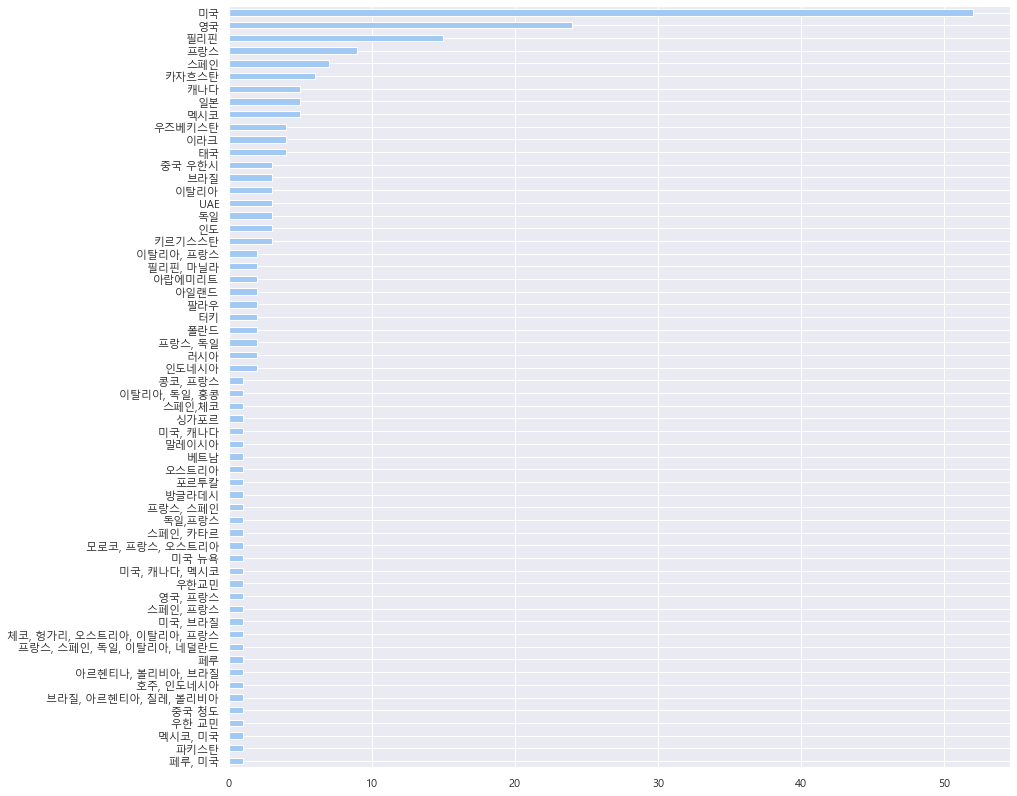

In [161]:
### 국가별 누적 확진자수를 구하고, 이를 시각화 하자 

print(df_day_oversea["국가"].value_counts().head(10))

df_day_oversea["국가"].value_counts().sort_values().plot.barh(figsize=(14, 14))

##### <font color = blue> cf. 보다 나은 분석/시각화를 위해서는 여행력(국가) 데이터에 대한 전처리가 필요하다. </font>
##### <font color = blue> 이 과정은 원본 데이터에 대한 상세한 리뷰와 상황에 맞는 적합한 전처리 방향 설정이 이뤄져야 한다. </font>

In [166]:
#### 유럽과 남미를 대륙단위로 통합하고, 기타 중복되는 단어들도 통일시켜 준다. 

europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
europe = europe.replace(", ", "|")
south_america = south_america.replace(", ", "|")

df_day_oversea.loc[df_day_oversea["국가"].str.contains(europe), "국가"] = "유럽"
df_day_oversea.loc[df_day_oversea["국가"].str.contains(south_america), "국가"] = "남미"
df_day_oversea.loc[df_day_oversea["국가"].str.contains('중국|우한'), "국가"] = "중국"
df_day_oversea.loc[df_day_oversea["국가"].str.contains('아랍에미리트'), "국가"] = "UAE"
df_day_oversea.loc[df_day_oversea["국가"].str.contains('필리핀'), "국가"] = "필리핀"
df_day_oversea.loc[df_day_oversea["국가"].str.contains('미국'), "국가"] = "미국"

df_day_oversea

,확진일자,국가,누적확진자수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,1
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,4
...,...,...,...
207,2020-07-10,카자흐스탄,7
208,2020-07-12,유럽,47
209,2020-07-12,우즈베키스탄,5
210,2020-07-15,이라크,3


유럽       68
미국       54
필리핀      17
남미       15
카자흐스탄     6
중국        6
일본        5
UAE       5
캐나다       5
이라크       4
Name: 국가, dtype: int64


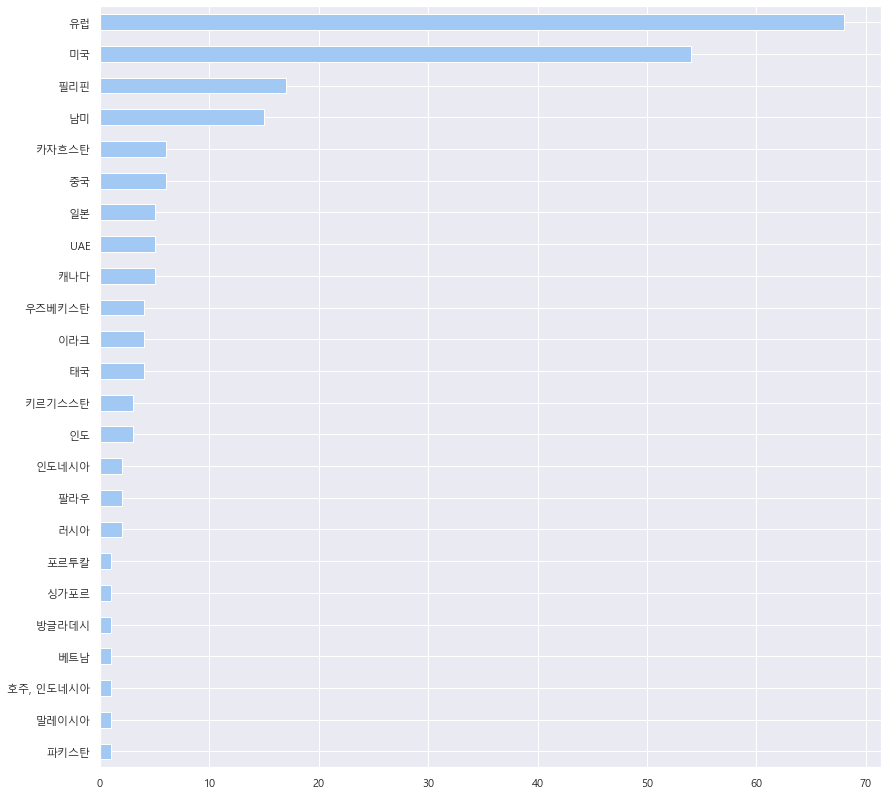

In [168]:
#### 정리된 데이터로 다시 시각화 

print(df_day_oversea["국가"].value_counts().head(10))
df_day_oversea["국가"].value_counts().sort_values().plot.barh(figsize=(14, 14))